In [1]:
## looking into public services accessibility by zip-code, alderman district
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
from matplotlib.pyplot import plot

calls_service = pd.read_csv('./data/mfdems.csv') # EMS Calls for Service Milwaukee
liq_lic = pd.read_csv('./data/liquorlicenses.csv') # Liquor License data Milwaukee
## https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi
nat_irs_16 = pd.read_csv('./data/16zpallagi.csv') # IRS Data 2016
nat_irs_16['zipcode'] = nat_irs_16['zipcode'].astype(np.float64)

In [2]:
print(calls_service.info())
print(nat_irs_16.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118921 entries, 0 to 118920
Data columns (total 5 columns):
Original Call for Service Type    118921 non-null object
Final Call for Service Type       118921 non-null object
Incident Date                     118921 non-null object
ZIP Code                          100792 non-null float64
Aldermanic District               112679 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179796 entries, 0 to 179795
Columns: 147 entries, STATEFIPS to A11902
dtypes: float64(1), int64(145), object(1)
memory usage: 201.6+ MB
None


In [3]:
mke_zipcodes = [x for x in calls_service['ZIP Code'].unique() if ~np.isnan(x)]
mke_alderdists = [x for x in calls_service['Aldermanic District'].unique() if ~np.isnan(x)]
mke_irs_16 = nat_irs_16[nat_irs_16['zipcode'].isin(mke_zipcodes)]
mke_irs_16.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
174830,55,WI,53051.0,1,5240,4460,530,230,1980,4570,...,2360,1824,0,0,0,0,480,302,4070,4469
174831,55,WI,53051.0,2,3810,2530,850,370,1680,5600,...,3490,9943,0,0,0,0,660,789,3050,5726
174832,55,WI,53051.0,3,2820,1340,1210,230,1420,5220,...,2740,16056,0,0,0,0,650,1174,2070,4988
174833,55,WI,53051.0,4,2290,480,1660,130,1130,5440,...,2270,19562,0,0,0,0,590,1398,1640,4875
174834,55,WI,53051.0,5,3880,350,3430,100,1900,11110,...,3860,66942,20,8,0,0,1340,4769,2390,9419


In [4]:
mke_zip_irs = mke_irs_16[['zipcode','N1','N2','NUMDEP','ELDERLY']].groupby(['zipcode']).sum()
mke_zip_irs.columns = ['returns','exemptions','dependents','elderly']
mke_zip_irs.head()

,returns,exemptions,dependents,elderly
zipcode,,,,
53051.0,19360,36240,9780,5950
53110.0,9290,16160,4400,2440
53130.0,4150,7360,1900,1290
53132.0,17430,33400,9420,5470
53154.0,18000,33730,9850,3940


In [5]:
mke_zip_agi_irs = mke_irs_16[['zipcode','agi_stub','N1','N2','NUMDEP','ELDERLY']].groupby(['zipcode','agi_stub']).sum()
mke_zip_agi_irs.columns = ['returns','exemptions','dependents','elderly']
mke_zip_agi_irs['returns_pct_zip'] = 100 * mke_zip_agi_irs['returns'] / mke_zip_agi_irs.groupby(level=[0])['returns'].transform('sum')
mke_zip_agi_irs.head()

returns  exemptions  dependents  elderly  returns_pct_zip
zipcode agi_stub                                                           
53051.0 1            5240        4570         540     1660        27.066116
        2            3810        5600         970     1220        19.679752
        3            2820        5220        1190     1000        14.566116
        4            2290        5440        1500      780        11.828512
        5            3880       11110        3810     1020        20.041322

In [6]:
agi_foreach_zip = mke_irs_16[['zipcode','agi_stub','N1']].pivot(index='agi_stub',columns='zipcode',values='N1')
agi_foreach_zip

zipcode,53051.0,53110.0,53130.0,53132.0,53154.0,53172.0,53202.0,53203.0,53204.0,53205.0,...,53220.0,53221.0,53222.0,53223.0,53224.0,53225.0,53226.0,53227.0,53228.0,53233.0
agi_stub,,,,,,,,,,,,,,,,,,,,,
1,5240,3310,1220,4750,5240,3720,3770,290,8920,2170,...,4760,7020,3900,5290,3950,5180,2530,4010,2440,1960
2,3810,2680,940,3140,4150,2830,3990,310,4930,820,...,4180,5190,3520,3680,2480,3520,2010,3850,1910,670
3,2820,1550,670,2440,2940,1660,2720,220,1130,230,...,2360,2890,2270,2030,1150,1380,1650,2170,1240,150
4,2290,920,470,2120,2080,1080,1190,100,330,80,...,1320,1700,1360,1110,700,740,1150,1210,930,40
5,3880,770,730,3880,3170,1100,1610,120,240,90,...,1270,1650,1430,1080,850,590,1890,1060,1220,40
6,1320,60,120,1100,420,100,990,90,110,0,...,110,150,140,120,100,50,650,100,230,0


In [7]:
agi_by_zip = mke_irs_16[['zipcode','agi_stub','N1']].pivot(index='zipcode',columns='agi_stub',values='N1')
pop_by_zip = mke_irs_16[['zipcode','N1']].groupby(['zipcode']).agg(['sum'])['N1']
errythang = pop_by_zip.join(agi_by_zip)
errythang.head()

,sum,1,2,3,4,5,6
zipcode,,,,,,,
53051.0,19360,5240,3810,2820,2290,3880,1320
53110.0,9290,3310,2680,1550,920,770,60
53130.0,4150,1220,940,670,470,730,120
53132.0,17430,4750,3140,2440,2120,3880,1100
53154.0,18000,5240,4150,2940,2080,3170,420


In [8]:
df=calls_service
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Incident Date'] = df['Incident Date'].dt.strftime('%Y-%m')
call_types = [x for x in df['Final Call for Service Type'].unique()]
call_types.sort()
print(call_types)

['ALARM', 'APPL', 'AUTOF', 'AUTOX', 'Abdominal Pain/Problems', 'Academy - Medical', 'Allergies (Reactions)/Envenomations (Stings, Bites)', 'Animal Bites/Attacks', 'Assault/Sexual Assault', 'Auto Accident', 'Auto Accident - Multiple Injuries', 'BTB1', 'BTB2', 'BTB3', 'Back Pain (Non-Traumatic or Non-Recent Trauma)', 'Bariatric Patient', 'Breathing Problems', 'Burns (Scalds)/Explosion (Blast)', 'CARBON', 'CTB1', 'CTB2', 'CTB3', 'Carbon Monoxide/Inhalation/Hazmat/CBRN', 'Cardiac or Respiratory Arrest/Death', 'Chest Pain (Non-Traumatic)', 'Choking', 'Combative Patient', 'Community Paramedic', 'Convulsions/Seizures', 'DIVE', 'Diabetic Problems', 'Downgraded Response', 'Drowning (Near)/Diving/Scuba Accident', 'ELECT', 'ELEV', 'ER', 'Electrocution/Lightning', 'Eye Problems/Injuries', 'FBRESP', 'FLUSH', 'FORCE', 'FULL', 'FULL2', 'FULL3', 'FULL4', 'Falls', 'Fire Station', 'GARAGE', 'GAS', 'GMIA2', 'GMIA3', 'GRASS', 'HAZMAT', 'HEAT', 'HIRISE1', 'HIRISE3', 'HRRESP', 'HURT', 'HURTRESP', 'Headache'

In [9]:
## group by original call type and aggregate by count
df.groupby('Original Call for Service Type').agg(['count'])['Incident Date'].sort_values(by='count',ascending=False).head()

,count
Original Call for Service Type,
Sick Person (Specific Diagnosis),18346
Breathing Problems,12116
Unknown Problem (Man Down),8604
Falls,7400
Traffic/Transportation Accidents,7211


In [10]:
## group by final call type and aggregate by count
df.groupby('Final Call for Service Type').agg(['count'])['Incident Date'].sort_values(by='count',ascending=False).head()

,count
Final Call for Service Type,
Sick Person (Specific Diagnosis),17342
Breathing Problems,10815
Unknown Problem (Man Down),7824
Falls,6943
Traffic/Transportation Accidents,6525


In [11]:
## Clearly there is a difference between the listings of original call type and final call type
df.groupby(['Original Call for Service Type','Final Call for Service Type']).agg(['count'])

Incident Date  \
                                                                                     count   
Original Call for Service Type Final Call for Service Type                                   
ALARM                          ALARM                                                  4801   
                               APPL                                                      1   
                               CARBON                                                    1   
                               ELEV                                                      1   
                               FULL                                                      9   
                               HIRISE1                                                   4   
                               LHAZMAT                                                   1   
                               LR                                                        1   
                               OOCFIRE                                                   1   
                               SMOKE                                                    13   
                               WATER                                                     1   
APPL                           APPL                                                    299   
                               AUTOF                                                     2   
                               FULL                                                     12   
                               LR                                                        1   
                               SMOKE                                                     1   
AUTOF                          AUTOF                                                   743   
                               AUTOX                                                     6   
                               FULL                                                      1   
                               GARAGE                                                   13   
                               HAZMAT                                                    2   
                               MFDPI                                                     1   
AUTOX                          AUTOX                                                   332   
                               CTB1                                                      2   
                               MTB2                                                      2   
                               PTB1                                                      2   
                               PTB3                                                      1   
                               Traffic/Transportation Accidents                          3   
Abdominal Pain/Problems        Abdominal Pain/Problems                                2630   
                               Assault/Sexual Assault                                    1   
...                                                                                    ...   
Unknown Problem (Man Down)     FORCE                                                    11   
                               Falls                                                     7   
                               Fire Station                                              1   
                               GAS                                                       1   
                               Headache                                                  6   
                               Heart Problems/A.I.C.D.                                   2   
                               Heat/Cold Exposure                                        3   
                               Hemorrhage/Lacerations                                    1   
                               MED Special Call                                          7   
                               MED 

In [12]:
all_calls_by_zip = df[["ZIP Code","Original Call for Service Type"]].groupby(['ZIP Code'], as_index=True).agg(['count']).sort_values(by='ZIP Code', ascending=True)['Original Call for Service Type']
all_calls_by_zip.columns = ['ServiceCalls']
sick_byZip = df[df['Original Call for Service Type']=='Sick Person (Specific Diagnosis)'].groupby('ZIP Code',as_index=True).agg(['count'])['Original Call for Service Type']
sick_byZip.columns=['SickPerson']

service_byZip = all_calls_by_zip.join(sick_byZip)
#
errythang.sort_values(by='zipcode')
service_byZip.sort_values(by= 'ZIP Code')
errythang = errythang.merge(service_byZip, left_index=True, right_index=True, how='left')
errythang.sort_values(by=['ServiceCalls','SickPerson'], ascending=False)

,sum,1,2,3,4,5,6,ServiceCalls,SickPerson
zipcode,,,,,,,,,
53206.0,8380,5790,2000,390,120,80,0,8945,1595.0
53209.0,19900,9860,5340,2180,1120,1170,230,8527,1511.0
53218.0,16670,8980,5100,1610,610,370,0,7854,1368.0
53204.0,15660,8920,4930,1130,330,240,110,6834,1152.0
53212.0,12930,6560,3770,1360,570,520,150,6725,1218.0
53216.0,13580,6950,4050,1440,640,460,40,6632,1136.0
53215.0,24440,12170,8210,2580,910,540,30,6065,940.0
53208.0,12570,6340,3420,1390,630,680,110,5997,1064.0
53210.0,10650,5900,2850,950,420,490,40,5966,1075.0


In [13]:
# MKE Service Call data
cardiac = df[df['Final Call for Service Type']=='Cardiac or Respiratory Arrest/Death'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
cardiac.columns = ['CardiacOrRespiratoryArrestOrDeath']
downgraded = df[df['Final Call for Service Type']=='Downgraded Response'].groupby(['Aldermanic District'], as_index=False).agg(['count'])['Final Call for Service Type']
downgraded.columns = ['DowngradedResponse']
#### Assault is only organized by Aldermanic District; can't get it by ZIP Code
assault_byAldDist = df[df['Final Call for Service Type']=='Assault/Sexual Assault'].groupby('Aldermanic District',as_index=True).agg(['count'])['Final Call for Service Type']
assault_byAldDist.columns=['AssaultSexualAssault']
any_service_call = df[['Aldermanic District','Final Call for Service Type']].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
any_service_call.columns = ['ServiceCalls']
## MKE Liquor License data
liq_avail = liq_lic[['ALDERMANIC_DISTRICT','EXP_DATE']].groupby(['ALDERMANIC_DISTRICT'], as_index=True).agg(['count']).sort_values(by='ALDERMANIC_DISTRICT', ascending=True)['EXP_DATE']
liq_avail.columns=['LiquorLicenses']

In [14]:
any_card_down = any_service_call.join(cardiac.join(downgraded)).join(assault_byAldDist)
all_byAldDist = any_card_down.merge(liq_avail,left_index=True,right_index=True,how='left')

In [15]:
all_byAldDist.sort_values(by=['ServiceCalls','AssaultSexualAssault','CardiacOrRespiratoryArrestOrDeath','DowngradedResponse','LiquorLicenses'], ascending=False)

,ServiceCalls,CardiacOrRespiratoryArrestOrDeath,DowngradedResponse,AssaultSexualAssault,LiquorLicenses
Aldermanic District,,,,,
15.0,12867,96,362,878,58
6.0,11953,82,206,756,99
4.0,11200,86,301,408,269
1.0,10595,68,194,591,35
7.0,10492,81,263,646,30
2.0,8807,77,248,466,22
9.0,8024,106,106,294,32
12.0,7033,81,206,425,188
8.0,5276,68,92,274,68


In [16]:
## Notice that District 4 is in the top five of all three lists!
## That's not a good thing

In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

ald_shp = shapefile.Reader("./shape/ald2018/alderman")

In [20]:
# plots a comparison of MKE aldermanic districts based on the input parameter, call_type
def plot_df_on_mke_ald_map(df,col):
    fig = plt.figure(figsize=(12,10))
    plt.title(col)
    ax = plt.axes()
    ax.set_aspect('equal')

    for i, shape in enumerate(ald_shp.shapes()):
        # define polygon fill color (facecolor) RGB values:
        R = df[col][float(ald_shp.record(i)[1])] / max(df[col])
        G = 0.1
        B = 0.1
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)
                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
                ax.add_patch(patch)
        # annotate the shape with aldermanic district number
        center_x = shape.bbox[0]+((shape.bbox[2]-shape.bbox[0])/2)
        center_y = shape.bbox[1]+((shape.bbox[3]-shape.bbox[1])/2)
        ax.annotate(ald_shp.record(i)[1],xy=(center_x,center_y),color='tan',
                    ha='center',va='center',fontsize=21)
    plt.xlim(ald_shp.bbox[0],ald_shp.bbox[2])
    plt.ylim(ald_shp.bbox[1],ald_shp.bbox[3])
    plt.axis('off')
    fig.savefig('./images/EMS_' + col + '_2018_alddist.png')

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


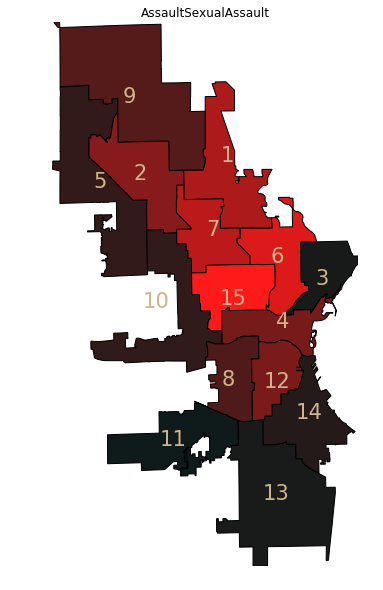

In [21]:
plot_df_on_mke_ald_map(all_byAldDist,'AssaultSexualAssault')

In [ ]:
plot_df_on_mke_ald_map(all_byAldDist,'CardiacOrRespiratoryArrestOrDeath')

In [ ]:
plot_df_on_mke_ald_map(all_byAldDist,'DowngradedResponse')

In [ ]:
plot_df_on_mke_ald_map(all_byAldDist,'LiquorLicenses')